## Importing the important libraries

In [128]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.color_palette("colorblind")
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Loading the dataset

In [129]:
MallCustomers = pd.read_csv("Dataset/MallCustomers.csv")
MallCustomers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Descriptive Analysis

#### Dataset statistics

In [130]:
MallCustomers[["Age", "Annual Income (k$)","Spending Score (1-100)"]].describe().round(3)

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000,200.000,200.000
mean,38.850,60.560,50.200
std,13.969,26.265,25.824
min,18.000,15.000,1.000
25%,28.750,41.500,34.750
50%,36.000,61.500,50.000
75%,49.000,78.000,73.000
max,70.000,137.000,99.000


#### Distribution Analysis of Mall Customer Data

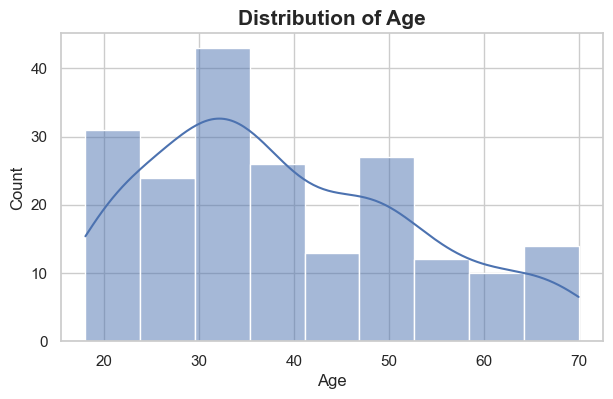

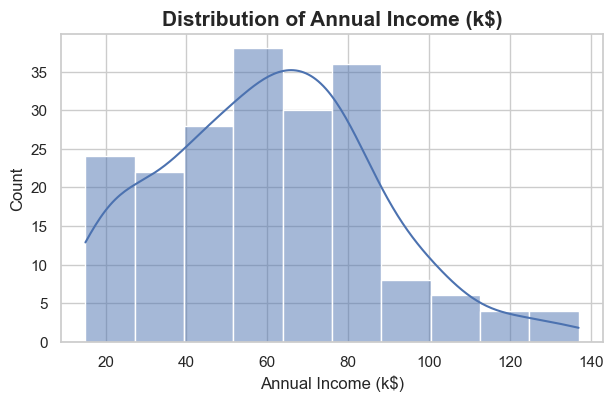

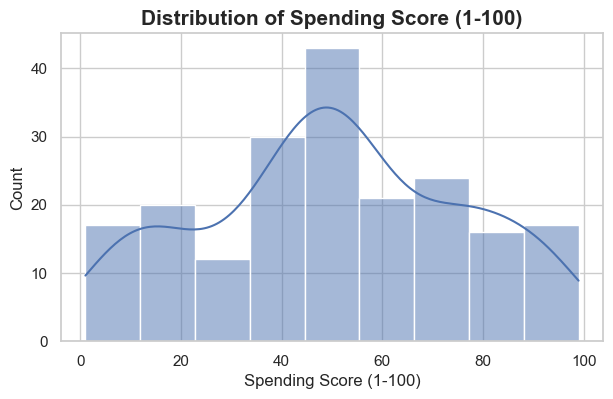

In [131]:
NumericalColumns = ["Age", "Annual Income (k$)","Spending Score (1-100)"]
for i in NumericalColumns:
    plt.figure(figsize=(7,4))
    sns.histplot(data=MallCustomers, x=i, kde=True) 
    plt.title(f"Distribution of {i}", fontsize=15, fontweight="bold")
    plt.show()

#### Gender-Based Distribution Analysis

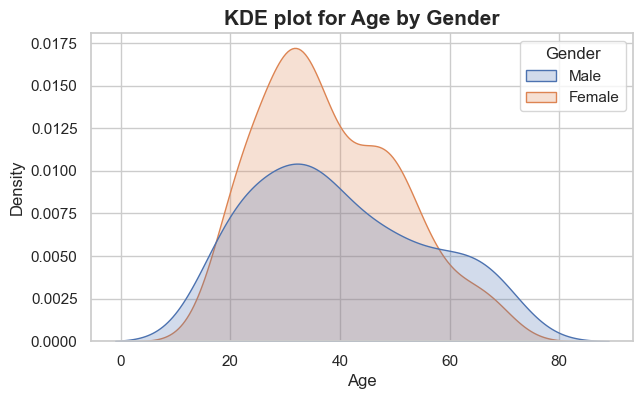

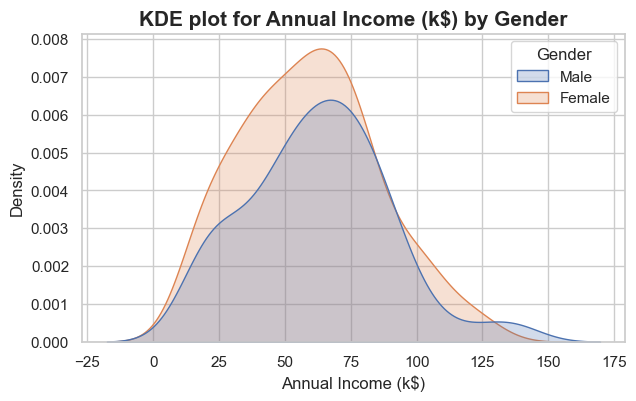

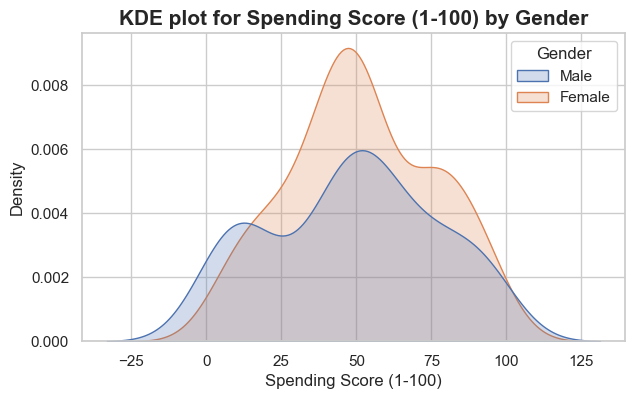

In [132]:
NumericalColumns = ["Age", "Annual Income (k$)","Spending Score (1-100)"]
for i in NumericalColumns:
    plt.figure(figsize=(7,4))
    sns.kdeplot(
        data=MallCustomers,
        x=i,
        hue="Gender",
        fill=True
    )
    plt.title(f"KDE plot for {i} by Gender", fontsize=15, fontweight="bold")

#### Box Plot: Feature Distribution by Gender

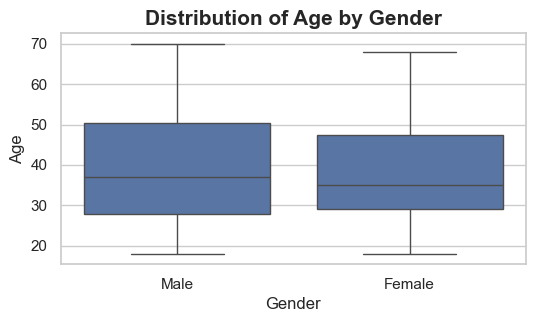

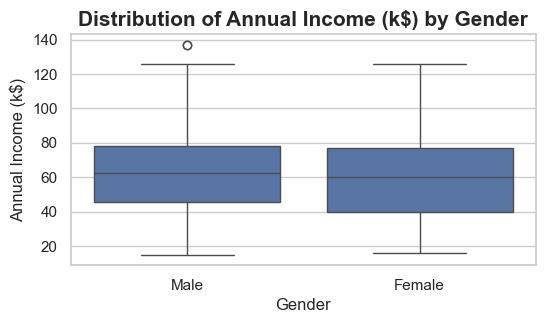

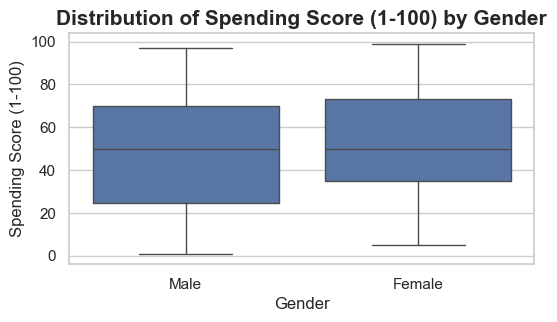

In [133]:
NumericalColumns = ["Age", "Annual Income (k$)","Spending Score (1-100)"]
for i in NumericalColumns:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=MallCustomers,x="Gender",y=MallCustomers[i])
    plt.title(f"Distribution of {i} by Gender", fontsize=15, fontweight="bold")
    plt.show()

#### Gender Distribution Percentage

In [134]:
MallCustomers['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Relational Analysis

#### Scatter Plot: Income vs. Spending for Segmentation

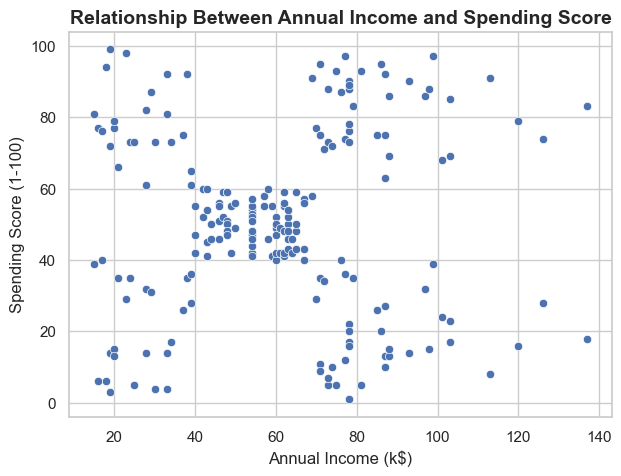

In [135]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=MallCustomers,
    x="Annual Income (k$)",
    y="Spending Score (1-100)"
)
plt.title("Relationship Between Annual Income and Spending Score", fontsize=14, fontweight="bold")
plt.show()

#### Visualize All Bivariate Customer Distributions

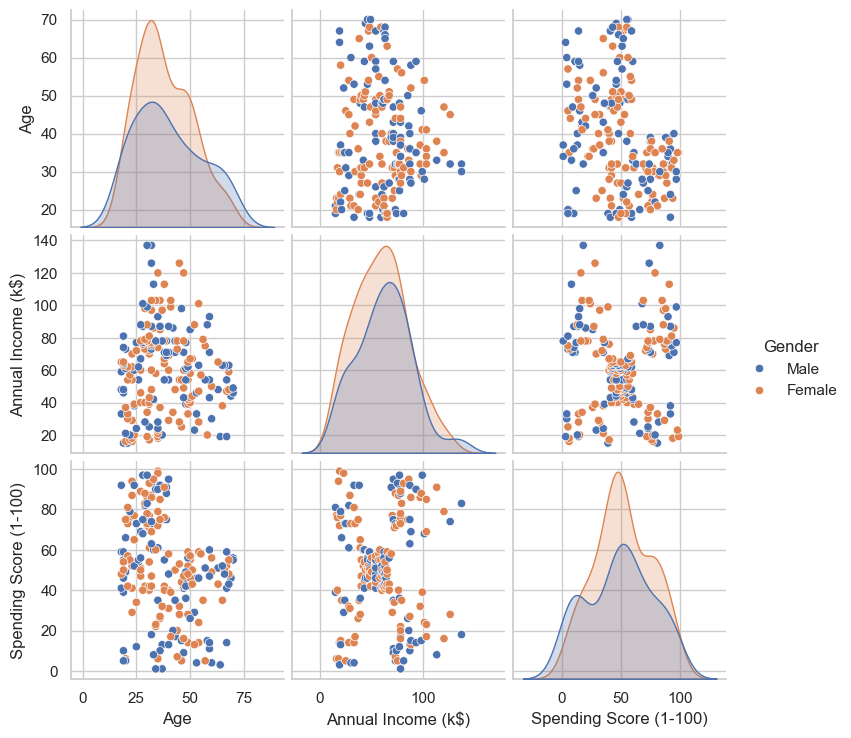

In [136]:
sns.pairplot(
    MallCustomers[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Gender"]],
    hue='Gender'
)
plt.show()

#### Mean Customer Metrics by Group 

In [137]:
MallCustomers.groupby(["Gender"])[["Age", "Annual Income (k$)","Spending Score (1-100)"]].mean().round(3)

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098,59.250,51.527
Male,39.807,62.227,48.511


#### Correlation Matrix of Customer Features

In [138]:
# Select only the numerical columns for correlation
NumericalColumnsForCorr = MallCustomers[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Calculate the correlation matrix
CorrelationMatrix = NumericalColumnsForCorr.corr().round(5)
CorrelationMatrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.00000,-0.0124,-0.32723
Annual Income (k$),-0.01240,1.0000,0.00990
Spending Score (1-100),-0.32723,0.0099,1.00000


#### Heatmap of Feature Correlation Matrix

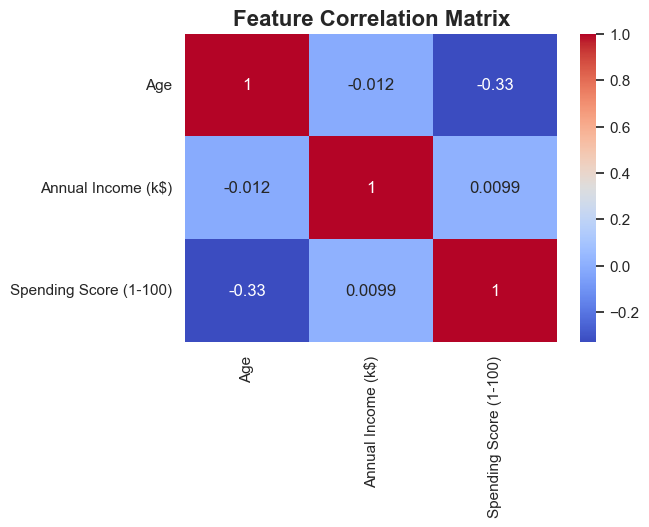

In [139]:
plt.figure(figsize=(6,4))
sns.heatmap(NumericalColumnsForCorr.corr(),annot=True,cmap="coolwarm")
plt.title("Feature Correlation Matrix", fontsize=16, fontweight="bold")
plt.show()

## Customer Segmentation using Clustering

### Univariate Clustering: K-Means Clustering on a single feature (Annual Income (k$)) and then running a loop to test how the clustering quality changes when using different numbers of clusters.

#### Initial Clustering

In [140]:
# Initializes the K-Means algorithm, telling it to find 3 distinct groups in the data.
ClusteringOne = KMeans(n_clusters=3)

In [141]:
# Trains the model using only the Annual Income (k$) column.
ClusteringOne.fit(MallCustomers[["Annual Income (k$)"]])

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [142]:
ClusteringOne.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [143]:
# Takes the result of the clustering (which cluster each customer belongs to) and saves it back into the DataFrame as a new column named "Income Cluster".
MallCustomers["Income Cluster"] = ClusteringOne.labels_
MallCustomers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
5,6,Female,22,17,76,1
6,7,Female,35,18,6,1
7,8,Female,23,18,94,1
8,9,Male,64,19,3,1
9,10,Female,30,19,72,1


In [144]:
MallCustomers["Income Cluster"].value_counts()

Income Cluster
0    92
1    72
2    36
Name: count, dtype: int64

In [145]:
# Calculates the Inertia, which is the Within-Cluster Sum of Squares (WCSS). 
# This measures how tightly packed the points are within their assigned clusters. Lower inertia is generally better.
ClusteringOne.inertia_

23528.15217391306

#### Finding the Optimal Clusters (The Elbow Method)

In [151]:
InertiaScoresOne=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(MallCustomers[['Annual Income (k$)']])
    InertiaScoresOne.append(kmeans.inertia_)

In [152]:
InertiaScoresOne

[137277.28000000006,
 48660.888888888876,
 25640.45778439684,
 13278.112713472483,
 9100.830157289774,
 5081.484660267268,
 3949.275613275612,
 3351.7711993888474,
 2428.5220612720623,
 1986.0560606060608]

#### Ploting intertia_scores against i (the number of clusters) to find the "elbow" point, which indicates the optimal k.

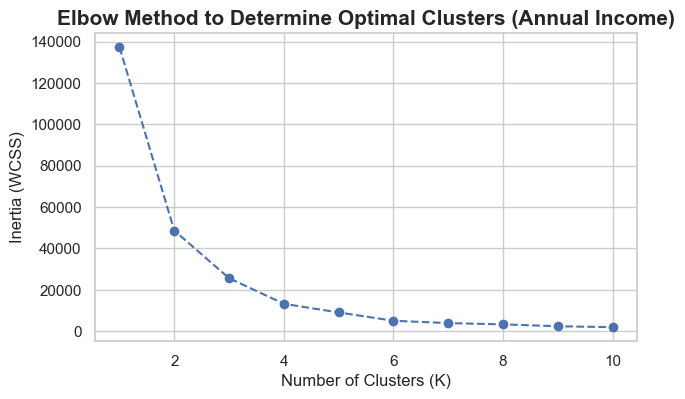

In [153]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), InertiaScoresOne, marker="o", linestyle="--") # Added marker and linestyle
plt.title("Elbow Method to Determine Optimal Clusters (Annual Income)", fontsize=15, fontweight="bold")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True) # Recommended for clarity
plt.show()

### Bivariate Clustering Analysis using the two most important features for segmentation: Annual Income and Spending Score.

In [150]:
ClusteringTwo = KMeans(n_clusters=5)
ClusteringTwo.fit(MallCustomers[['Annual Income (k$)','Spending Score (1-100)']])
MallCustomers['Spending and Income Cluster'] = ClusteringTwo.labels_
MallCustomers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,4
5,6,Female,22,17,76,1,0
6,7,Female,35,18,6,1,4
7,8,Female,23,18,94,1,0
8,9,Male,64,19,3,1,4
9,10,Female,30,19,72,1,0


In [156]:
InertiaScoresTwo = []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(MallCustomers[['Annual Income (k$)','Spending Score (1-100)']])
    InertiaScoresTwo.append(kmeans2.inertia_)

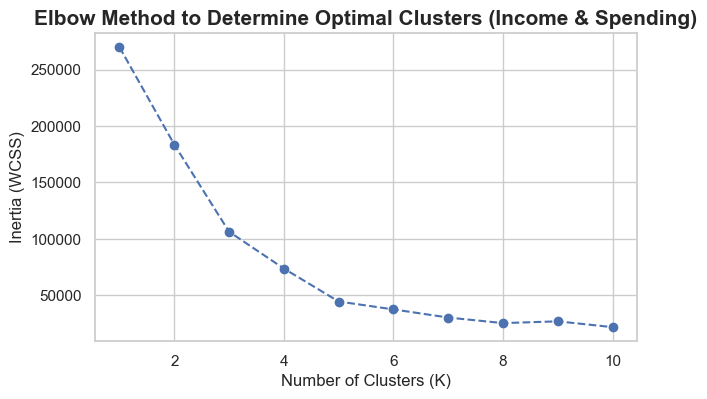

In [158]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), InertiaScoresTwo, marker="o", linestyle="--") # Added marker and linestyle
plt.title("Elbow Method to Determine Optimal Clusters (Income & Spending)", fontsize=15, fontweight="bold")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True) # Recommended for clarity
plt.show()

In [163]:
# Takes the coordinates of the 5 cluster centers (calculated by K-Means) and converts them into a pandas DataFrame.
Centers =pd.DataFrame(ClusteringTwo.cluster_centers_)
# Names the columns 'x' (Annual Income) and 'y' (Spending Score) for easy plotting access.
Centers.columns = ['x','y']

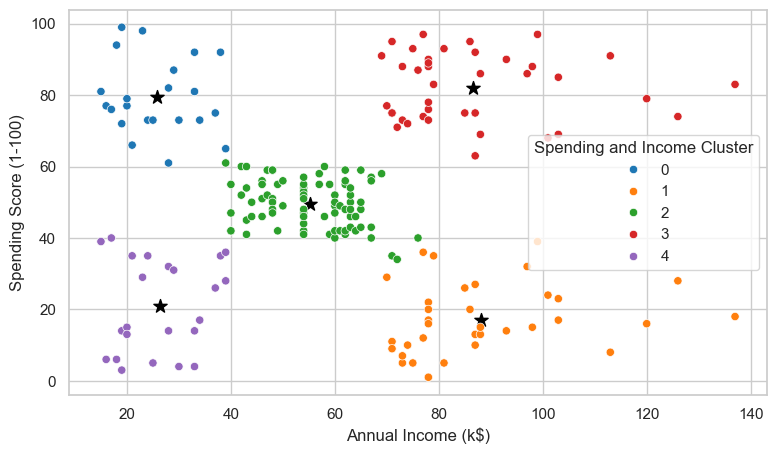

In [164]:
plt.figure(figsize=(9,5))
plt.scatter(x=Centers['x'],y=Centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=MallCustomers, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10');

#### Cluster group mean metrics

In [167]:
MallCustomers.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(3)

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.273,25.727,79.364
1,41.114,88.200,17.114
2,42.716,55.296,49.519
3,32.692,86.538,82.128
4,45.217,26.304,20.913


### Mulivariate clustering 

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
Scale = StandardScaler()
MallCustomers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,4
5,6,Female,22,17,76,1,0
6,7,Female,35,18,6,1,4
7,8,Female,23,18,94,1,0
8,9,Male,64,19,3,1,4
9,10,Female,30,19,72,1,0


In [170]:
MallCustomersEncoded = pd.get_dummies(MallCustomers,drop_first=True)
MallCustomersEncoded.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,4,True
1,2,21,15,81,1,0,True
2,3,20,16,6,1,4,False
3,4,23,16,77,1,0,False
4,5,31,17,40,1,4,False
5,6,22,17,76,1,0,False
6,7,35,18,6,1,4,False
7,8,23,18,94,1,0,False
8,9,64,19,3,1,4,True
9,10,30,19,72,1,0,False


In [172]:
MallCustomersEncoded = MallCustomersEncoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
MallCustomersEncoded.head(10)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
5,22,17,76,False
6,35,18,6,False
7,23,18,94,False
8,64,19,3,True
9,30,19,72,False


In [173]:
MallCustomersEncoded = Scale.fit_transform(MallCustomersEncoded)

In [174]:
MallCustomersEncoded = pd.DataFrame(Scale.fit_transform(MallCustomersEncoded))
MallCustomersEncoded.head(10)

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
5,-1.209269,-1.662660,1.001596,-0.886405
6,-0.276302,-1.624491,-1.715913,-0.886405
7,-1.137502,-1.624491,1.700384,-0.886405
8,1.804932,-1.586321,-1.832378,1.128152
9,-0.635135,-1.586321,0.846310,-0.886405


In [175]:
InertiaScoresThree=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(MallCustomersEncoded)
    InertiaScoresThree.append(kmeans3.inertia_)

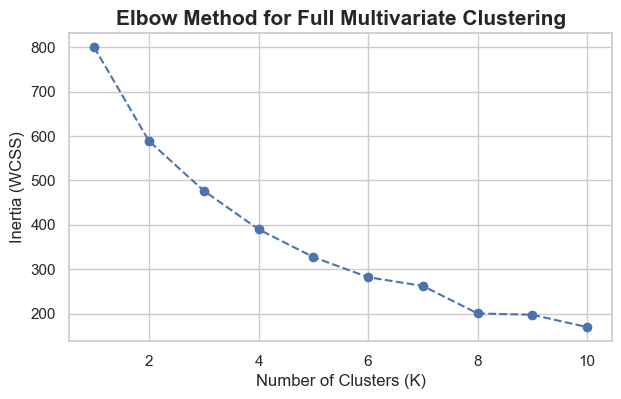

In [177]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), InertiaScoresThree, marker="o", linestyle="--") # Added marker and linestyle
plt.title("Elbow Method for Full Multivariate Clustering", fontsize=15, fontweight="bold")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True) # Recommended for clarity
plt.show()